Bee-Wasp classifier.
Pictures were downloaded from Google:
Press CmdAltJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
# define classes for classification
classes = ['bees', 'wasps']

In [3]:
folder = 'bees'
file = 'bees.csv'

In [4]:
path = Path('/Users/Christina/01_Files/18_DataScience/Kaggle')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
#!cp ../input/* {path}/

In [6]:
download_images(path/file, dest, max_pics=200)

In [7]:
folder = 'wasps'
file = 'wasps.csv'

In [8]:
path = Path('/Users/Christina/01_Files/18_DataScience/Kaggle')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
download_images(path/file, dest, max_pics=200)

In [10]:
# remove any images that can't be opened
for c in classes:
     print(c)
     verify_images(path/c, delete=True, max_size=500)

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [12]:
data.classes

['bees', 'wasps']

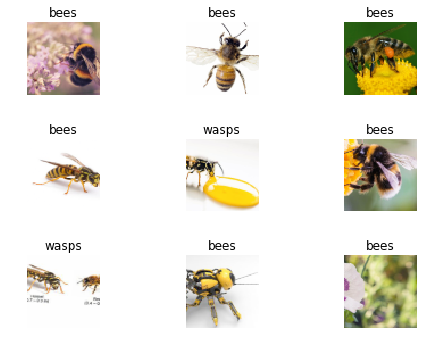

In [17]:
data.show_batch(rows=3, figsize=(7,5))

In [20]:
data.c

2

In [21]:
len(data.train_ds)

294

In [22]:
len(data.valid_ds)

73

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.133863,1.351416,0.369863,00:12
1,1.044363,1.174650,0.273973,00:12
2,0.914417,1.007870,0.287671,00:13
3,0.881795,0.912152,0.287671,00:13


In [23]:
learn.save('stage-1')

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


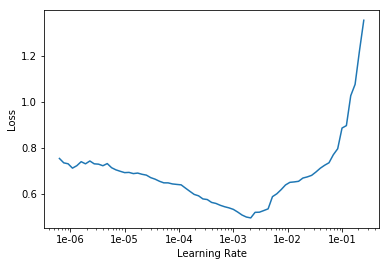

In [47]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.655774,0.919600,0.301370,00:21
1,0.672218,0.914236,0.328767,00:22


In [27]:
learn.save('stage-2')

In [28]:
learn.load('stage-2');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

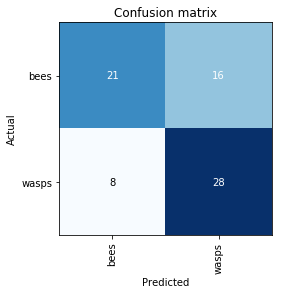

In [30]:
interp.plot_confusion_matrix()

In [31]:
from fastai.widgets import *

In [32]:
#In order to clean the entire set of images, we need to create a new dataset without the split. T
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [33]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [34]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. ImageCleaner will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from top_losses.ImageCleaner(ds, idxs)

In [35]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [36]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [37]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [40]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_none()
                    .label_from_df()
                  .transform(get_transforms(), size=224)
                  .databunch()
     )

In [42]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [43]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.649064,0.900524,0.328767,00:24
1,0.554973,0.893812,0.315068,00:22


In [45]:
accuracy?? #returns source code